/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


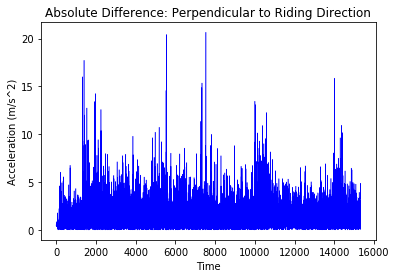

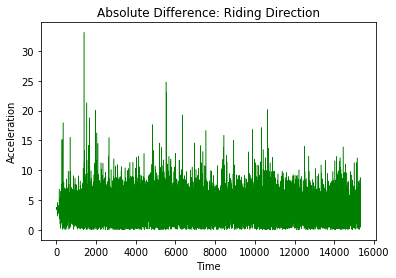

In [61]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math


#import the file from wherever you have it on your computer 
file=pd.read_excel(r'/Users/natalieneri/ASU F20/flatgrounddata.xlsx') 
df=pd.DataFrame(file,columns=['Ax','Ay','Az','Ax2','Ay2','Az2'])

#convert the data to a matrix, then make the accelerometer datasets into vectors
#lol I know this is such bad coding but my brain has deteriorated in 2020
data=df.as_matrix()
seconds=5
n=3065*seconds #this is all the points for 5 seconds
t=np.arange(n)
#split the two accelerometers A and B
Ax=data[0:n,0]
Ay=data[0:n,1]
Az=data[0:n,2]
Bx=data[0:n,3]
By=data[0:n,4]
Bz=data[0:n,5]

#let's try finding the difference 
#I don't know if we would want absolute value or not??
#will have to try different ways with different data 
x1=abs(Ax-Bx)
y1=abs(Ay-By)
z1=abs(Az-Bz)

#coordinate transformations
theta=20.46
x=x1*(math.sin(theta)+math.cos(theta))
z=z1*abs(-math.sin(theta)+math.cos(theta))

#plot the difference 
plt.plot(t,x,color='blue', linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Absolute Difference: Perpendicular to Riding Direction')
plt.show()

#plt.plot(t,y,color='red',linewidth=0.5, label='y')
plt.plot(t,z,color='green',linewidth=0.5, label='z')
plt.title('Absolute Difference: Riding Direction')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.show()

